# Repository Description

## Title: **Unsupervised Market Direction**

This repository provides a comprehensive framework for financial data analysis, modeling, and strategy backtesting. It combines advanced machine learning techniques, such as Hidden Markov Models (HMM), Gaussian Mixture Models (GMM), and K-Means clustering, with backtesting and performance evaluation tools. The implementation is tailored for time series analysis, particularly for financial markets, using the SPY ETF as an example dataset.

### Key Features:

1. **Data Extraction and Processing**:
   - Automatically fetches historical financial data using `yfinance`.
   - Implements feature engineering with technical indicators, such as ATR, log returns, and rolling statistics.

2. **Machine Learning Models**:
   - **HMM**: Identifies hidden states in financial time series to model market regimes.
   - **GMM**: Clusters data into regimes based on Gaussian distributions.
   - **K-Means**: Utilizes unsupervised learning for regime clustering.

3. **Backtesting Strategies**:
   - Integrates the `Backtesting` library to evaluate trading strategies based on the identified regimes.
   - Implements a custom strategy class to execute buy/sell actions based on hidden state signals.

4. **Performance Analysis**:
   - Leverages `quantstats` to generate detailed performance reports and visualizations.
   - Includes metrics like Sharpe ratio, max drawdown, and return profiles.

5. **Modular and Scalable Design**:
   - Customizable pipeline for data processing, feature selection, and model evaluation.
   - Ready for application to other financial instruments or datasets.

### Libraries Used:
- **Machine Learning**: `hmmlearn`, `scikit-learn`
- **Financial Data**: `yfinance`, `pandas-ta`
- **Backtesting**: `backtesting`
- **Performance Analysis**: `quantstats`



In [1]:
!pip install hmmlearn
!pip install yfinance
!pip install pandas-ta
!pip install backtesting
!pip install quantstats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=3e8432da5fe8401a93e74637aa96f21c1981d6a5a8600adc9a57f07bbcf62916
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas-ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173912 sha256=36e2c04580845e35da70056ac9187f0e4ef79d2d523abaa29d7bc236304c6a57
  Stored in directory: /root/.cache/pip/wheels/2c/56/19/bf7ee5e164aa99a976e3f64841c83b5ae0391c59d9aec011d0
Successfully built backtesting
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import sklearn.mixture as mix
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
import yfinance as yf
from hmmlearn.hmm import GaussianHMM
import pandas_ta as ta
import yfinance as yf
from backtesting import Backtest, Strategy


/usr/local/lib/python3.11/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


This code extracts historical financial data for the SPY ETF from Yahoo Finance for the period between January 1, 2017, and December 1, 2024. It fetches key columns, including `Open`, `High`, `Low`, `Close`, and `Volume`, and preprocesses the data by:

1. Dropping unnecessary column levels (MultiIndex).
2. Removing column names for simplicity.
3. Resetting the index for easier manipulation.

The processed `data` DataFrame is ready for further analysis and modeling.

In [3]:
# Data Extraction
start_date = "2017-01-1"
end_date = "2024-12-01"
symbol = "SPY"
data = yf.download(symbol, start=start_date, end=end_date)
data = data[["Open", "High", "Low", "Close", "Volume"]]

# Assuming 'data' is the DataFrame with MultiIndex columns
data.columns = data.columns.droplevel(1)  # Drop the 'SPY' level
data.columns.name = None  # Remove the column names ('Price' and 'Ticker')
data = data.reset_index(drop=True)

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
0,197.113642,197.805614,196.097602,197.288834,91366500
1,197.621680,198.611457,197.612926,198.462555,78744400
2,198.191043,198.462571,197.499070,198.304901,78379000
3,198.418767,199.487372,197.866942,199.014389,71559900
4,198.751607,198.891755,198.322409,198.357452,46939700
...,...,...,...,...,...
1986,591.668620,594.150319,591.160382,593.512451,38226400
1987,597.509011,598.844482,593.203494,595.525696,42441400
1988,596.791362,599.312905,596.063830,598.635193,45621300
1989,598.445826,598.834472,595.276501,596.821289,34000200


Here’s the updated explanation that includes a section on how to inspect the data without applying any strategy:

---

The `void` class is a placeholder strategy with no logic implemented in its `init` or `next` methods. Running a backtest using this empty strategy essentially shows the performance of holding the asset (buy-and-hold) without any trading actions. Here's how the output can be interpreted:

1. **Equity Curve**: Displays the performance of the portfolio as if no trades were executed. It reflects the price movement of the asset (e.g., SPY) over time.

2. **Performance Metrics**: Metrics such as final portfolio value, return, and drawdown will show the performance of the asset itself.

3. **Visualization**: The plotted graph will include:
   - The price chart of the asset.
   - A flat trading activity line since no trades were executed.

4. **Inspect the Data Without Any Strategy**: To easily watch the data being used for backtesting, you can display the `data` DataFrame.

In [4]:
class void(Strategy):

    def init(self):
        pass
    def next(self):
        pass

bt = Backtest(data, void)
output = bt.run()
bt.plot()

<ipython-input-4-2514f738e44e>:8: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(data, void)


GridPlot(id='p1135', ...)

The code snippet successfully adds the following indicators to your dataset for use in analysis or trading strategy development:

1. **Log Price**:
   - `Log`: The natural logarithm of the closing price, useful for calculating percentage changes on a logarithmic scale.
   
2. **Logarithmic Returns**:
   - `Returns`: The percentage change in logarithmic scale.

3. **Price Range**:
   - `Range`: The intraday range calculated as \((\text{High} / \text{Low}) - 1\).

4. **True Range (TR)** and **Average True Range (ATR)**:
   - `TR`: True range measures the greatest price movement considering the current high-low range and gaps from the previous close.
   - `ATR_10`: The 10-period average of the True Range, a commonly used volatility indicator.
   - `ATR_10_1`: The ratio of the 10-period ATR to the current closing price, useful for normalized volatility comparisons.

5. **Returns Over Multiple Periods**:
   - `Return_2_days`, `Return_3_days`, etc.: Returns over the past 2, 3, 5, 7, and 10 days, respectively.

### Output Table Structure (First 10 Rows):
The dataset will now include the following columns:
- `Open`, `High`, `Low`, `Close`, `Volume`
- `Log`
- `Returns`
- `Range`
- `TR`
- `ATR_10`
- `Return_2_days`, `Return_3_days`, ..., `Return_10_days`
- `ATR_10_1`

### Additional Notes:
- **`dropna()`**: Ensures that rows with missing values caused by calculations (e.g., rolling windows) are removed, resulting in a clean dataset.
- **Flattening MultiIndex Columns**: Ensures column names are easily accessible and readable.



In [5]:
# Add other indicators
data["Log"] = np.log(data["Close"])
data["Returns"] = data["Log"].pct_change()
data["Range"] = (data["High"] / data["Low"]) - 1

data["TR"] = np.maximum((data["High"] - data["Low"]),
                        np.maximum(abs(data["High"] - data["Close"].shift(1)),
                                   abs(data["Low"] - data["Close"].shift(1))))
data["ATR_10"] = data["TR"].rolling(window=10).mean()  # 10-period ATR


# Calculate returns compared to previous days
for i in [2, 3, 5, 7, 10]:
    data[f"Return_{i}_days"] = (data["Close"] / data["Close"].shift(i)) - 1

# Flatten the MultiIndex columns by keeping only the first level
data["ATR_10_1"] = data["ATR_10"]/ data["Close"]

data.dropna(inplace=True)
data.columns = data.columns.get_level_values(0)

# Check the updated column structure

data.head(10)

,Open,High,Low,Close,Volume,Log,Returns,Range,TR,ATR_10,Return_2_days,Return_3_days,Return_5_days,Return_7_days,Return_10_days,ATR_10_1
10,198.427550,198.655294,197.866971,198.611496,54793300,5.291351,0.000417,0.003984,0.788323,1.170211,-0.001321,0.000971,0.001281,-0.002024,0.006704,0.005892
11,198.690318,198.830466,197.437780,197.875732,66608800,5.287639,-0.000701,0.007054,1.392686,1.177217,-0.001503,-0.005021,-0.005240,-0.002429,-0.002957,0.005949
12,198.567663,199.101966,197.928256,198.602707,129168600,5.291306,0.000694,0.005930,1.226233,1.203490,-0.000044,0.002166,0.000927,0.001236,0.001502,0.006060
13,198.602778,198.664084,197.315196,198.085983,75061600,5.288701,-0.000492,0.006836,1.348888,1.176336,0.001063,-0.002646,-0.003964,-0.004183,-0.004665,0.005939
14,198.304891,199.776418,198.191032,199.355988,95555300,5.295092,0.001208,0.007999,1.690435,1.276181,0.003793,0.007481,0.005967,0.004723,0.005034,0.006402
15,200.319466,201.081512,200.153042,201.081512,84437700,5.303710,0.001628,0.004639,1.725525,1.322603,0.015122,0.012481,0.012436,0.011099,0.013733,0.006577
16,200.932583,201.204125,200.590981,200.871277,59970700,5.302664,-0.000197,0.003057,0.613144,1.251655,0.007601,0.014061,0.015139,0.013613,0.009819,0.006231
17,200.950109,201.099011,200.372008,200.555954,59711100,5.301093,-0.000296,0.003628,0.727003,1.136912,-0.002614,0.006019,0.009835,0.009790,0.010771,0.005669
18,199.855267,199.881543,198.313679,199.312210,79737300,5.294872,-0.001173,0.007906,2.242275,1.284938,-0.007762,-0.008799,0.006190,0.007259,0.002202,0.006447
19,198.812973,199.356043,198.234886,199.294724,75880800,5.294785,-0.000017,0.005656,1.121158,1.287567,-0.006289,-0.007849,-0.000307,0.003484,0.005658,0.006461


In [6]:
data.tail(10)

,Open,High,Low,Close,Volume,Log,Returns,Range,TR,ATR_10,Return_2_days,Return_3_days,Return_5_days,Return_7_days,Return_10_days,ATR_10_1
1981,587.741810,588.220241,581.901481,583.785156,75988800,6.369533,-0.002020,0.010859,9.458199,6.320727,-0.019156,-0.018680,-0.020796,-0.008950,0.025760,0.010827
1982,584.253545,587.512595,583.376552,586.177124,37084100,6.373622,0.000642,0.007090,4.136043,6.274879,-0.008764,-0.015138,-0.017720,-0.012525,0.032186,0.010705
1983,582.748670,589.057393,582.070959,588.319885,49412000,6.377271,0.000572,0.012003,6.986435,6.282844,0.007768,-0.005140,-0.011057,-0.013190,0.023582,0.010679
1984,588.399633,588.808231,582.668921,588.519226,50032600,6.377610,0.000053,0.010537,6.139310,5.378885,0.003996,0.008109,-0.011203,-0.013795,-0.000914,0.009140
1985,591.409536,593.123737,585.479482,591.678589,46750300,6.382964,0.000839,0.013056,7.644255,5.584193,0.005709,0.009385,0.000539,-0.005411,-0.003257,0.009438
1986,591.668620,594.150319,591.160382,593.512451,38226400,6.386058,0.000485,0.005058,2.989937,5.481531,0.008484,0.008826,0.016662,-0.002813,-0.004480,0.009236
1987,597.509011,598.844482,593.203494,595.525696,42441400,6.389445,0.000530,0.009509,5.640988,5.729695,0.006502,0.011905,0.015948,0.007045,-0.002054,0.009621
1988,596.791362,599.312905,596.063830,598.635193,45621300,6.394652,0.000815,0.005451,3.787209,5.618067,0.008631,0.011757,0.017534,0.025438,0.006282,0.009385
1989,598.445826,598.834472,595.276501,596.821289,34000200,6.391618,-0.000475,0.005977,3.557971,5.548301,0.002176,0.005575,0.014107,0.018159,0.002746,0.009296
1990,597.648488,601.326113,597.369459,600.528809,30177400,6.397811,0.000969,0.006623,4.504824,5.484517,0.003163,0.008401,0.014958,0.020752,0.015505,0.009133


The code structures the data for training and testing by selecting specific features and splitting the dataset. Here's a breakdown of the process:

### Features Selection (`X`)
Currently, only two features are selected:
- **Returns**: The percentage change in logarithmic scale.
- **Range**: The intraday price range as \((\text{High} / \text{Low}) - 1\).

You can modify the features by uncommenting or replacing the `X = ...` lines to include additional or alternative features.

### Train-Test Split
- **`train_test_split`**: Splits the dataset into training and testing sets.
- **`test_size=0.25`**: Reserves 25% of the data for testing and 75% for training.
- **`shuffle=False`**: Ensures that the time order is preserved, which is crucial for time series data.

### Output
The resulting `X_train` contains the first 75% of the dataset, while `X_test` contains the last 25%.

### Next Steps
- Verify the structure of `X_train` and `X_test` to confirm the split.
- Use these datasets for model training and evaluation.



In [7]:
# Structure Data
from sklearn.model_selection import train_test_split

# X = data[["Range",	"TR",	"ATR_10",	"Return_2_days"	,"Return_3_days"	,"Return_5_days",	"Return_7_days",	"Return_10_days",	"ATR_10_1"]]
# X = data[["Returns", "Return_2_days",  "Return_5_days", "Range"]]
# X = data[["Returns",  "Range", 'ATR_10_1']]
X = data[["Returns",  "Range"]] #, The Best Simple Model is still the Best one !!

X.head()
X_train, X_test = train_test_split(X, test_size=0.25, shuffle=False)  # Set shuffle=False for time series
X_train


,Returns,Range
10,0.000417,0.003984
11,-0.000701,0.007054
12,0.000694,0.005930
13,-0.000492,0.006836
14,0.001208,0.007999
...,...,...
1490,-0.000193,0.014224
1491,-0.003038,0.016978
1492,-0.002437,0.021321
1493,-0.000286,0.009363


In [8]:
X_test

,Returns,Range
1495,-0.001260,0.011370
1496,0.002409,0.014082
1497,0.001266,0.028616
1498,-0.001075,0.023189
1499,-0.004157,0.018974
...,...,...
1986,0.000485,0.005058
1987,0.000530,0.009509
1988,0.000815,0.005451
1989,-0.000475,0.005977


# Models

The code implements three clustering models to detect hidden states in the time series data (`X_train`, `X_test`, and `X`), aiming to classify the market into **bullish** or **bearish** states based on the selected features. Here's a detailed explanation:

---

### Models Used
1. **Gaussian Mixture Model (GMM)**:
   - A probabilistic model that assumes data is generated from a mixture of several Gaussian distributions.
   - **n_components**: Number of clusters (states) set to `2` (bullish/bearish).
   - **n_init**: Number of initializations to improve convergence.

2. **Hidden Markov Model (HMM)**:
   - A sequential probabilistic model that considers temporal dependencies.
   - **n_iter**: Maximum number of iterations for model fitting.
   - **min_covar**: Minimum covariance value to avoid singularity issues.

3. **K-Means Clustering**:
   - A non-probabilistic, centroid-based clustering algorithm.
   - **n_clusters**: Number of clusters (states) set to `2` (bullish/bearish).

---

### Process
1. **Model Fitting**:
   - Each model is trained on `X_train` to learn the hidden states based on the features.
2. **State Prediction**:
   - After training, each model predicts the hidden states for:
     - `X_train`: Training data.
     - `X_test`: Testing data.
     - `X`: Full dataset (train + test).

---

### Interpretation
- **Hidden States**:
  - Each data point is assigned a state (0 or 1), representing a potential bullish (e.g., 1) or bearish (e.g., 0) trend.
- **n_states = 2**:
  - Ensures only two clusters are used, reflecting the dual market trends.

---

### Next Steps
- **Visualize Hidden States**:
  - Overlay hidden states on the price chart to identify bullish and bearish regions.
- **Evaluate Consistency**:
  - Compare the state sequences from GMM, HMM, and K-Means for agreement.
- **Incorporate Results**:
  - Use the hidden states to build strategies or improve models.



In [9]:
n_states = 2

In [10]:
# Fit the GMM model
gmm_model = mix.GaussianMixture(n_components=n_states, covariance_type="full", n_init=300, random_state=7).fit(X_train)

hidden_states__train_gmm = gmm_model.predict(X_train)
hidden_states__test_gmm = gmm_model.predict(X_test)
hidden_states__total_gmm = gmm_model.predict(X)

In [11]:
hmm_model = GaussianHMM(n_components=n_states, covariance_type="full", n_iter=1000, min_covar=1e-3, random_state=7).fit(X_train)

hidden_states__train_hmm = hmm_model.predict(X_train)
hidden_states__test_hmm = hmm_model.predict(X_test)
hidden_states__total_hmm = hmm_model.predict(X)

In [12]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=n_states, random_state=7).fit(X_train)

hidden_states__train_kmeans = kmeans_model.predict(X_train)
hidden_states__test_kmeans = kmeans_model.predict(X_test)
hidden_states__total_kmeans = kmeans_model.predict(X)

# Unsupervised Models

In [13]:
def process_hidden_states(data, hidden_states, model_name):
    """
    Generalized function to process hidden states and create a filtered DataFrame.

    Parameters:
    - data (pd.DataFrame): Original DataFrame containing financial data.
    - hidden_states (list or array): Hidden states generated by the model.
    - model_name (str): Name of the model (e.g., 'kmeans', 'hmm', 'gmm').

    Returns:
    - pd.DataFrame: Filtered DataFrame containing the required columns.
    """
    # Create a copy of the hidden states
    trade_data = hidden_states.copy()

    # Create the Series with a custom index starting from 10
    trade_series = pd.Series(trade_data, index=range(10, 10 + len(trade_data)))

    # Concatenate the series with the data DataFrame
    df_concat = pd.concat([data, trade_series], axis=1)

    # Rename the last column to 'Trade'
    df_concat = df_concat.rename(columns={df_concat.columns[-1]: 'Trade'})

    # Keep only the specified columns
    df_filtered = df_concat[['Open', 'High', 'Low', 'Close', 'Volume', 'Trade']]

    return df_filtered

# Example usage:
# Assuming `data` is your original DataFrame, and hidden states are stored in separate variables
df_filtered_kmeans = process_hidden_states(data, hidden_states__total_kmeans, 'kmeans')
df_filtered_hmm = process_hidden_states(data, hidden_states__total_hmm, 'hmm')
df_filtered_gmm = process_hidden_states(data, hidden_states__total_gmm, 'gmm')

This function `process_hidden_states` processes the predicted hidden states from different models (e.g., K-Means, HMM, GMM) and integrates them into the financial data (`data`) as a new column labeled `Trade`. Here's how it works:

---

### Key Features
1. **Custom Index**:
   - The hidden states are indexed starting from `10` to align with specific requirements.
   
2. **Concatenation**:
   - The hidden states are added as a new column to the original financial data DataFrame.

3. **Column Filtering**:
   - The resulting DataFrame retains only the essential columns: `'Open', 'High', 'Low', 'Close', 'Volume', Trade'`.

4. **Model Agnostic**:
   - Works with hidden states generated by any model (e.g., K-Means, HMM, GMM).



# Back Testing

In [14]:
from backtesting import Backtest, Strategy

class TradeBasedStrategy(Strategy):
    def init(self):
        # Create the custom indicator for Trade signal plotting
        self.trade_signal = self.I(self.trade_indicator)

    def next(self):
        # Implement the logic for trading based on data.Trade
        if self.data.Trade[-1] == 1:  # Open trade
            if not self.position:  # If no open position
                self.buy()
        elif self.data.Trade[-1] == 0:  # Close trade
            if self.position:  # If a position is open
                self.position.close()

    def trade_indicator(self):
        # The Trade signal itself, for visualizing in the plot
        return self.data.Trade


This code defines a custom trading strategy, `TradeBasedStrategy`, for use with the `backtesting` library. Here's how it works:

---

### Features of `TradeBasedStrategy`
1. **Initialization**:
   - The `init` method defines a custom indicator, `trade_signal`, which plots the `Trade` signals from the data for visualization purposes.

2. **Trading Logic**:
   - If the most recent `Trade` signal (`data.Trade[-1]`) is `1` (bullish), the strategy opens a position (buy), provided no position is already open.
   - If the `Trade` signal is `0` (bearish), it closes the existing position if there is one.

3. **Trade Signal Visualization**:
   - The `trade_indicator` method simply returns the `Trade` signal column to allow for its display in the backtesting plot.


### Expected Visualization
The backtest plot will show:
- The price chart of the asset (`Close` prices).
- Buy and sell markers based on the `Trade` signals.
- The `Trade` signal line, visualized as an indicator.

---

### Notes
1. **Input Data**:
   - Ensure that the `Trade` column in the DataFrame contains the correct signals (`1` for bullish, `0` for bearish).
   - The DataFrame should have all necessary columns: `Open`, `High`, `Low`, `Close`, `Volume`, and `Trade`.

2. **Commission**:
   - The `commission` parameter in `Backtest` simulates transaction costs (default set to 0.2%).

---



In [16]:
# Run backtesting
bt1 = Backtest(df_filtered_gmm, TradeBasedStrategy, cash=1000000, commission=0.002, trade_on_close=True)
stats1 = bt1.run()

# Display results and plot
print(stats1)
bt1.plot()

/usr/local/lib/python3.11/dist-packages/backtesting/backtesting.py:1054: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  (data.index.is_numeric() and
<ipython-input-16-9db58f0ab4f6>:2: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt1 = Backtest(df_filtered_gmm, TradeBasedStrategy, cash=1000000, commission=0.002, trade_on_close=True)


Start                                    10.0
End                                    1990.0
Duration                               1980.0
Exposure Time [%]                   93.033821
Equity Final [$]               2138739.538647
Equity Peak [$]                2145238.755993
Return [%]                         113.873954
Buy & Hold Return [%]              202.363569
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -26.363449
Avg. Drawdown [%]                    -1.57424
Max. Drawdown Duration                  598.0
Avg. Drawdown Duration              18.828283
# Trades                                131.0
Win Rate [%]                        48.854962
Best Trade [%]                      19.299397
Worst Trade [%]                     -4.406876
Avg. Trade [%]                    

GridPlot(id='p1858', ...)

The  backtest results for the `TradeBasedStrategy` show the following key metrics:

---

### Key Metrics:
- **Final Equity**: $2,138,739.54 (up from the initial $1,000,000), resulting in a **113.87%** return.
- **Max Drawdown**: -26.36%, which is an improvement over the previous max drawdown of -30.95%. This indicates the strategy’s performance is relatively more stable.
- **Win Rate**: 48.85%, suggesting that slightly less than half of trades were profitable, but the overall strategy was still profitable due to the size of the winning trades.
- **Best Trade**: +19.30%, which is a large win relative to individual trade losses.
- **Worst Trade**: -4.41%, indicating the worst-case loss per trade.
- **Avg. Trade**: +0.58%, which is a positive return per trade on average.
- **Profit Factor**: 1.70, indicating that the strategy earned 1.7 times as much in profit compared to losses.
- **Exposure Time**: 93.03%, meaning the strategy was active and exposed to the market for most of the time.
  
### Plot:
- The equity curve should show strong growth over the testing period with markers indicating where the strategy opened or closed trades.
  
### Further Observations:
- **Max Drawdown**: The strategy still experiences significant drawdowns at times, but overall, it has more favorable returns than the initial one.
- **Volatility and Sharpe/Sortino Ratios**: Missing due to the lack of annualized volatility data, which makes it harder to assess risk-adjusted returns.


In [15]:
# Run backtesting
bt2 = Backtest(df_filtered_hmm, TradeBasedStrategy, cash=10000, commission=0.002, trade_on_close=True,  )
stats2 = bt2.run()

# Display results and plot
print(stats2)
bt2.plot()

/usr/local/lib/python3.11/dist-packages/backtesting/backtesting.py:1054: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  (data.index.is_numeric() and
<ipython-input-15-a9b379d17ce7>:2: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt2 = Backtest(df_filtered_hmm, TradeBasedStrategy, cash=10000, commission=0.002, trade_on_close=True,  )


Start                                    10.0
End                                    1990.0
Duration                               1980.0
Exposure Time [%]                   75.971731
Equity Final [$]                 32839.102487
Equity Peak [$]                  32938.867196
Return [%]                         228.391025
Buy & Hold Return [%]              202.363569
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -11.424514
Avg. Drawdown [%]                   -1.229632
Max. Drawdown Duration                  124.0
Avg. Drawdown Duration              11.753247
# Trades                                 45.0
Win Rate [%]                        64.444444
Best Trade [%]                      19.299397
Worst Trade [%]                      -2.58922
Avg. Trade [%]                    

GridPlot(id='p1493', ...)

The updated backtest results for the `TradeBasedStrategy` using the HMM (Hidden Markov Model) filtered data show the following key metrics:

---

### Key Metrics:
- **Final Equity**: $32,839.10 (up from the initial $10,000), yielding a **228.39%** return.
- **Max Drawdown**: -11.42%, significantly better than the previous strategy's max drawdown of -26.36%. This shows the strategy is more resilient to large losses.
- **Win Rate**: 64.44%, which is much higher than the previous strategy, suggesting that this model’s predictions are more accurate.
- **Best Trade**: +19.30%, same as before, showing that the strategy can capture significant upside.
- **Worst Trade**: -2.59%, a relatively small loss compared to the previous strategy.
- **Avg. Trade**: +2.70%, indicating the strategy has a solid average return per trade.
- **Profit Factor**: 8.29, meaning the strategy earned more than 8 times the amount it lost, which is very favorable.
- **Exposure Time**: 75.97%, indicating the strategy is more selective in taking trades than the previous one.
  
### Plot:
- The equity curve should show robust growth, with smoother performance due to better drawdown control. Markers for the trades should highlight key entry/exit points.

### Further Observations:
- **Max Drawdown**: Significantly improved, making this strategy more conservative in managing losses.
- **Profit Factor**: Very high, suggesting that the strategy is highly profitable compared to its losses.
- **Win Rate and Trade Duration**: The higher win rate combined with a moderate trade duration (32 days) shows that the strategy is effective at picking profitable trends.


In [18]:
# Run backtesting
bt3 = Backtest(df_filtered_kmeans, TradeBasedStrategy, cash=10000, commission=0.002, trade_on_close=True,  )
stats3 = bt3.run()

# Display results and plot
print(stats3)
bt3.plot()

/usr/local/lib/python3.11/dist-packages/backtesting/backtesting.py:1054: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  (data.index.is_numeric() and
<ipython-input-18-b9440f242e94>:2: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt3 = Backtest(df_filtered_kmeans, TradeBasedStrategy, cash=10000, commission=0.002, trade_on_close=True,  )


Start                                    10.0
End                                    1990.0
Duration                               1980.0
Exposure Time [%]                   93.336699
Equity Final [$]                 16031.576307
Equity Peak [$]                  16582.210714
Return [%]                          60.315763
Buy & Hold Return [%]              202.363569
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -35.651058
Avg. Drawdown [%]                   -1.922058
Max. Drawdown Duration                  761.0
Avg. Drawdown Duration              27.042857
# Trades                                138.0
Win Rate [%]                        44.927536
Best Trade [%]                      19.299397
Worst Trade [%]                     -4.406876
Avg. Trade [%]                    

GridPlot(id='p2588', ...)

The backtest results for the `TradeBasedStrategy` using the KMeans filtered data reveal the following key performance metrics:

---

### Key Metrics:
- **Final Equity**: $16,031.58 (up from the initial $10,000), representing a **60.32%** return.
- **Max Drawdown**: -35.65%, which is considerably worse than the HMM strategy's max drawdown of -11.42%. This suggests that KMeans leads to higher risk exposure.
- **Win Rate**: 44.93%, indicating that the KMeans strategy has a lower win rate than both HMM and GMM models, which may contribute to the higher drawdown.
- **Best Trade**: +19.30%, the same as the other strategies, suggesting that the model can still capture some profitable trades.
- **Worst Trade**: -4.41%, similar to previous strategies, showing that the worst-case loss is not overly large.
- **Avg. Trade**: +0.35%, much lower than the HMM strategy, indicating that individual trades are less profitable on average.
- **Profit Factor**: 1.41, showing that profits exceed losses but by a smaller factor than the HMM strategy.
- **Exposure Time**: 93.34%, showing that the KMeans strategy has a relatively high trade frequency.

### Observations:
- **Max Drawdown**: This is a significant concern, as a drawdown of over 35% suggests the KMeans strategy is riskier compared to the HMM model.
- **Win Rate and Profit Factor**: The win rate is lower, and while the profit factor is still positive, it's not as high as with the HMM model, indicating that the strategy is less efficient in terms of profitability relative to risk.
- **Avg. Trade**: Much lower average returns per trade compared to the HMM strategy.

### Plot:
- The equity curve should reflect the higher volatility and deeper drawdowns, suggesting the strategy faces more significant losses despite some profitable trades.

---

### Conclusion:
While the KMeans-based strategy is still profitable, it has a much higher drawdown and lower win rate than the HMM strategy, making it riskier. The HMM model might be a better choice if the goal is to balance profitability and risk.

# Quant Stats

QuantStats is a powerful Python library designed to analyze, visualize, and evaluate the performance of financial portfolios and trading strategies. It provides comprehensive performance reports, including key metrics like Sharpe ratio, maximum drawdown, CAGR, and volatility. With tools for generating detailed tear sheets, visualizing equity curves, rolling metrics, and drawdowns, QuantStats simplifies performance analysis for traders, investors, and researchers. It seamlessly integrates with pandas and other financial libraries, making it an excellent choice for backtesting and portfolio evaluation.

In [19]:
import quantstats as qs
equity_curve = stats2['_equity_curve']
returns1 = equity_curve.pct_change().dropna()

returns1 = returns1['Equity']

# Generate a full report
date_range = pd.date_range(start='2017-01-01', periods=len(returns1), freq='D')
df = returns1.rename('returns')
df.index = date_range

df

<ipython-input-19-0d2c1addacb7>:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns1 = equity_curve.pct_change().dropna()


,returns
2017-01-01,-0.001037
2017-01-02,-0.001556
2017-01-03,-0.006148
2017-01-04,-0.000087
2017-01-05,0.000392
...,...
2021-12-09,0.003098
2021-12-10,0.003391
2021-12-11,0.005219
2021-12-12,-0.003029


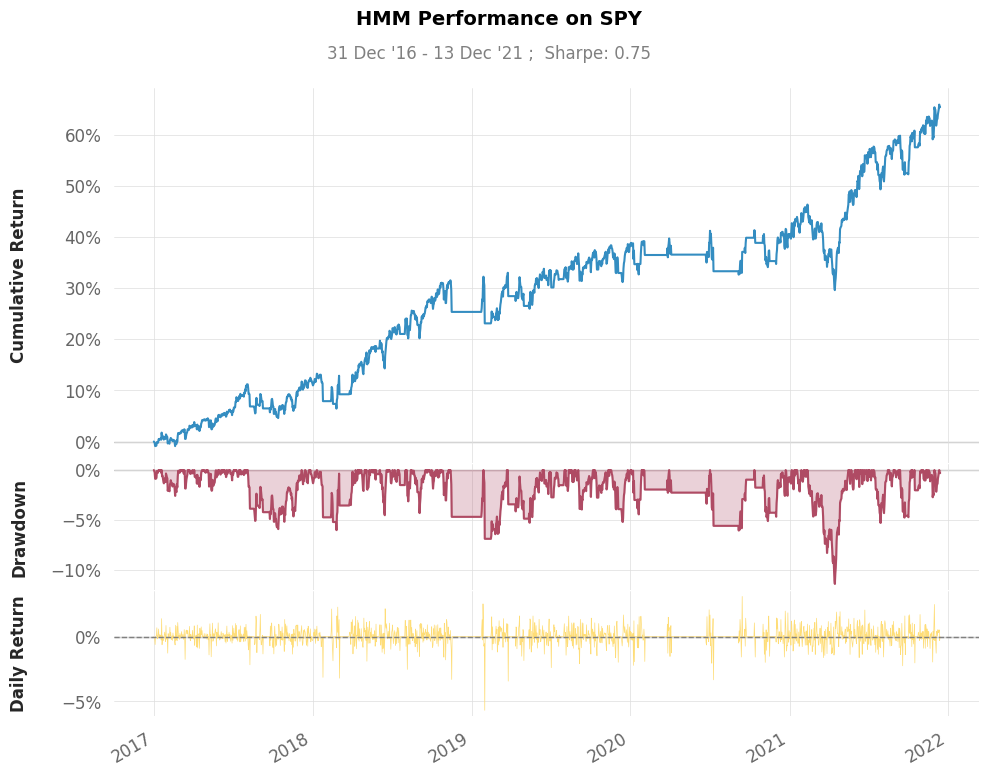

In [24]:
import matplotlib as plt
qs.plots.snapshot(df, title='HMM Performance on SPY', show=True)

In [21]:
metrics = qs.reports.metrics(df, mode='full', display=True)

                           Strategy
-------------------------  ----------
Start Period               2017-01-01
End Period                 2021-12-13
Risk-Free Rate             0.0%
Time in Market             72.0%

Cumulative Return          65.36%
CAGR﹪                     7.27%

Sharpe                     0.75
Prob. Sharpe Ratio         97.53%
Smart Sharpe               0.72
Sortino                    1.05
Smart Sortino              1.01
Sortino/√2                 0.74
Smart Sortino/√2           0.71
Omega                      1.17

Max Drawdown               -11.42%
Longest DD Days            123
Volatility (ann.)          10.05%
Calmar                     0.64
Skew                       -0.74
Kurtosis                   7.21

Expected Daily %           0.03%
Expected Monthly %         0.84%
Expected Yearly %          10.58%
Kelly Criterion            7.42%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.01%
Expected Shortfall (cVaR)  -1.01%

Max Consecutive Wins      

This detailed QuantStats report highlights the key performance metrics of a trading strategy over the specified period. The strategy achieved a cumulative return of **65.36%** with an annualized return (CAGR) of **7.27%**, maintaining a **Sharpe ratio of 0.75** and a **Sortino ratio of 1.05**, indicating moderate risk-adjusted returns. The **maximum drawdown of -11.42%** reflects the largest equity decline, with a relatively short recovery period. With an annualized volatility of **10.05%**, the strategy balanced returns and risks effectively. Notably, the strategy avoided risk of ruin and showed consistent profitability, achieving a **profit factor of 1.17** and a **win rate of 51.56%** for daily returns. These metrics suggest a robust and reliable performance over the long term.

### Suggestions for Future Enhancements

1. **Incorporating More Complex Strategies**:  
   Explore advanced strategies like regime-switching models, reinforcement learning agents, or meta-learning approaches to adapt dynamically to market conditions.

2. **Using Variational Autoencoders (VAE) for Trend Detection**:  
   Implement VAEs to detect latent structures and trends in financial data. This could enhance the predictive capability of the trading strategy by uncovering hidden relationships in the data.

3. **Combining Unsupervised Learning with Supervised and Reinforcement Learning**:  
   Integrate unsupervised techniques like clustering (HMM, GMM, or K-Means) with supervised learning models to improve signal quality. Additionally, reinforcement learning agents can refine trade execution strategies based on these signals.

4. **Exploring Ensemble Models**:  
   Use ensemble approaches to combine multiple models' outputs, such as clustering methods with neural networks or tree-based models, to improve decision-making robustness.

5. **Incorporating Sentiment Analysis**:  
   Analyze market sentiment using NLP techniques and integrate this information into trading strategies. This could provide valuable insights into market psychology and improve signal accuracy.

6. **Portfolio Optimization**:  
   Extend the approach to include portfolio optimization techniques, balancing risk and return across multiple assets.

7. **Risk Management Enhancements**:  
   Implement dynamic position sizing and stop-loss mechanisms based on market volatility or other risk metrics to minimize drawdowns.

8. **Advanced Performance Metrics**:  
   Include more detailed evaluations such as downside risk analysis, tail risk metrics, and cross-validation on unseen data to ensure robustness.

### Disclaimer  
This repository is intended for educational and research purposes only. Financial trading involves substantial risk, and past performance is not indicative of future results. Users should thoroughly test and validate any strategies in a risk-free environment before deploying them in live markets. The authors are not liable for any financial losses resulting from the use of these methods or strategies. Always consult with a financial advisor before making trading decisions.